In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [3]:
data_file_name = 'MNIST/diabetes.csv'
data = pd.read_csv(data_file_name)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
number_train_data = int(len(data)*0.65)
number_test_data = len(data) - number_train_data

feature_names = data.columns
feature_column_name = feature_names[2]
label_column_name = data.columns[-1]
classes_name = data[label_column_name].unique()

train_data = data.iloc[:number_train_data]
test_data = data.iloc[number_train_data:]

print("Info of MNSIT used it in classifer")
print("Number of data : %d, number of training data : %d, and number of test data : %d "%(len(data),len(train_data),len(test_data)))

print("classifer used ( "+feature_column_name+" )features")

Info of MNSIT used it in classifer
Number of data : 768, number of training data : 499, and number of test data : 269 
classifer used ( BloodPressure )features


In [5]:
class Gaussian_Classifer_One_Dimension:
    def __init__(self):
        pass
    
    #creates method that calculates mean (is the average of the number)
    def mean(self, numbers):
        return sum(numbers)/float(len(numbers))
    
    #creates method that calculates standard deviation (is a measure of how spread out numbers are.)
    def standard_deviation(self, numbers, mu):
        sum_number = 0
        N_number = 1/(float(len(numbers)))
        for i in numbers:
            sum_number = sum_number+((i-mu)**2)
        return np.sqrt(N_number*sum_number)
    
    #created method that calculates prior probability (which is the probability of an even "A" occurring)
    #to use it in fitting model to predict new feature.
    def prior_prob(self,data, target, target_column_name, feature_name):
        return len(data[data[target_column_name]==target][feature_name])/float(len(data))
    
    #creates method that calculates density function of model (which is a distribution over real number).
    #it's instead of liklihood calcaulation but it is for continous data.
    def density_function(self,X_feature, mu, std):
        return np.exp(-(X_feature-mu)**2/(2*std**2))*(1/(np.sqrt(2*np.pi)*std))
    
    #summarize two important paramter in model to fit it.
    def summarize_mu_std(self,data, target, target_column_name, feature_name):
        mu = dict()
        std = dict()
        for i in target:
            numbers = data[data[target_column_name] == i][feature_name]
            mu_class = self.mean(numbers)
            std_class = self.standard_deviation(numbers, mu_class)
            mu[i] = mu_class
            std[i] = std_class
        return mu, std
    
    #creates method that calculates posterior probablity which is used to predict lables.
    def predict(self, data, new_x_feature, target, target_column_name, feature_name):
        posterior_prob = list()
        mu, std = self.summarize_mu_std(data, target, target_column_name, feature_name)
        for i in range(len(target)):
            posterior_calc = self.density_function(new_x_feature, mu[target[i]], std[target[i]])*\
                             self.prior_prob(data, target[i], target_column_name, feature_name)
            posterior_prob.append((posterior_calc,target[i]))
        posterior_prob.sort(key=lambda x: x[0], reverse=True)
        return posterior_prob[0]
    
    #creates method that predict new features using scipy libraray and numpy.
    def predict_from_scipy(self, data, new_x_feature, target, target_column_name, feature_name):
        posterior_prob = list()
        for i in range(len(target)):
            data_for_each_label = sorted(data[data[target_column_name] == target[i]][feature_name].values)
            mu = np.mean(data_for_each_label)
            std = np.std(data_for_each_label)
            prior_for_each_label = self.prior_prob(data, target[i], target_column_name, feature_name)
            posterior_calc = stats.norm.pdf(new_x_feature, loc=mu, scale=std)*prior_for_each_label
            posterior_prob.append((posterior_calc,target[i]))
        posterior_prob.sort(key=lambda x : x[0], reverse=True)
        return posterior_prob[0]
    
    #creates method that calculates number of correct label predicted to get accuracy of classifer.
    def get_accuracy(self,train_data, test_data, target, target_column_name, feature_name):
        count_correct_predict = 0
        count_correct_predict_scipy = 0
        for i in range(len(test_data)):
            get_predict = self.predict(train_data, test_data[feature_name].values[i], target, target_column_name, feature_name)
            get_predict_scipy = self.predict_from_scipy(train_data, test_data[feature_name].values[i], target, target_column_name, feature_name)
            if(get_predict[1] == test_data[target_column_name].values[i]):
                count_correct_predict = count_correct_predict+1
                
            if(get_predict_scipy[1] == test_data[target_column_name].values[i]):
                count_correct_predict_scipy = count_correct_predict_scipy+1
        Acc_from_implemented = count_correct_predict/len(test_data)
        Acc_from_scipy = count_correct_predict_scipy/len(test_data)
        return Acc_from_implemented, Acc_from_scipy
    
    def plot_distribution(self, data, target, target_column_name, feature_name):
        mu, std = self.summarize_mu_std(data, target, target_column_name, feature_name)
        plt.figure()
        for i in range(len(target)):
            data_for_each_label = sorted(data[data[target_column_name] == target[i]][feature_name].values)
            data_for_each_label = np.array(data_for_each_label)
            prior_prob_for_each_label = self.prior_prob(data, target[i], target_column_name, feature_name)
            pdf_for_each_label = self.density_function(data_for_each_label, mu[target[i]], std[target[i]])
            plt.plot(data_for_each_label, pdf_for_each_label, label = target[i])
        plt.legend()
        plt.figure()

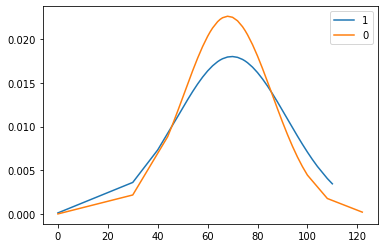

<Figure size 432x288 with 0 Axes>

In [6]:
gs = Gaussian_Classifer_One_Dimension()
gs.plot_distribution(train_data, classes_name, label_column_name, feature_column_name)

In [7]:
correct_label = test_data[label_column_name].values[0]
test_point = test_data[feature_column_name].values[0]
predict_label = gs.predict(train_data, test_point, classes_name, label_column_name, feature_column_name)
pred_scipy = gs.predict_from_scipy(train_data, test_point, classes_name, label_column_name, feature_column_name)
print("Result from my implemented")
print("Predict label is : %d, Expected label is : %d\n"%(predict_label[1], correct_label))
print("Result from scipt library")
print("Predict label is : %d, Expected label is : %d\n"%(pred_scipy[1], correct_label))
print("---------------------------------------------------")

correct_label = test_data[label_column_name].values[51]
test_point = test_data[feature_column_name].values[51]
predict_label = gs.predict(train_data, test_point, classes_name, label_column_name, feature_column_name)
pred_scipy = gs.predict_from_scipy(train_data, test_point, classes_name, label_column_name, feature_column_name)
print("Result from my implemented")
print("Predict label is : %d, Expected label is : %d\n"%(predict_label[1], correct_label))
print("Result from scipt library")
print("Predict label is : %d, Expected label is : %d\n"%(pred_scipy[1], correct_label))
print("---------------------------------------------------")

correct_label = test_data[label_column_name].values[96]
test_point = test_data[feature_column_name].values[96]
predict_label = gs.predict(train_data, test_point, classes_name, label_column_name, feature_column_name)
pred_scipy = gs.predict_from_scipy(train_data, test_point, classes_name, label_column_name, feature_column_name)
print("Result from my implemented")
print("Predict label is : %d, Expected label is : %d\n"%(predict_label[1], correct_label))
print("Result from scipt library")
print("Predict label is : %d, Expected label is : %d\n"%(pred_scipy[1], correct_label))
print("---------------------------------------------------")

Result from my implemented
Predict label is : 0, Expected label is : 0

Result from scipt library
Predict label is : 0, Expected label is : 0

---------------------------------------------------
Result from my implemented
Predict label is : 0, Expected label is : 0

Result from scipt library
Predict label is : 0, Expected label is : 0

---------------------------------------------------
Result from my implemented
Predict label is : 0, Expected label is : 1

Result from scipt library
Predict label is : 0, Expected label is : 1

---------------------------------------------------


In [8]:
acc_implemented, acc_scipy = gs.get_accuracy(train_data, test_data, classes_name, label_column_name, feature_column_name)
print("The accuracy of classifer using my implementation is : %.5f "%(acc_implemented*100)+"%")
print("The accuracy of classifer using my scipy & numpy lib. is : %.5f "%(acc_scipy*100)+"%")


The accuracy of classifer using my implementation is : 66.17100 %
The accuracy of classifer using my scipy & numpy lib. is : 66.17100 %


classifer used ( SkinThickness )features
The accuracy of classifer using my implementation is : 67.65799 %
The accuracy of classifer using my scipy & numpy lib. is : 67.65799 %


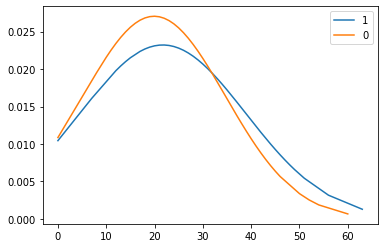

<Figure size 432x288 with 0 Axes>

In [10]:
feature_column_name = feature_names[3]
print("classifer used ( "+feature_column_name+" )features")

gs.plot_distribution(train_data, classes_name, label_column_name, feature_column_name)

acc_implemented, acc_scipy = gs.get_accuracy(train_data, test_data, classes_name, label_column_name, feature_column_name)
print("The accuracy of classifer using my implementation is : %.5f "%(acc_implemented*100)+"%")
print("The accuracy of classifer using my scipy & numpy lib. is : %.5f "%(acc_scipy*100)+"%")

classifer used ( Glucose )features
The accuracy of classifer using my implementation is : 79.18216 %
The accuracy of classifer using my scipy & numpy lib. is : 79.18216 %


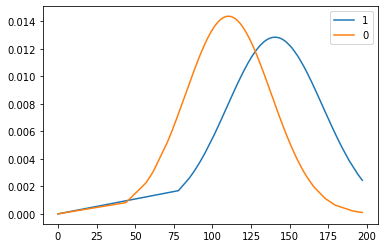

<Figure size 432x288 with 0 Axes>

In [11]:
feature_column_name = feature_names[1]
print("classifer used ( "+feature_column_name+" )features")

gs.plot_distribution(train_data, classes_name, label_column_name, feature_column_name)

acc_implemented, acc_scipy = gs.get_accuracy(train_data, test_data, classes_name, label_column_name, feature_column_name)
print("The accuracy of classifer using my implementation is : %.5f "%(acc_implemented*100)+"%")
print("The accuracy of classifer using my scipy & numpy lib. is : %.5f "%(acc_scipy*100)+"%")